# __Datenbereinigung Teil 1: Filterung der Daten__

In diesem Schritt wird eine erste Bereinigung der Daten durchgeführt. Es werden zudem die Dateien für die Analyse der Gesamtdaten und für die Analyse der Anforderungen erstellt.

Dieser Teil funktioniert nur mit Daten von JobCloud

In [1]:
# Import der benötigten Libraries
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import re
import os

# Working-Directory
os.chdir('C:/Users/Sven Konermann/Documents/Master/2_Semester/aF_E_Faelle/Unterlagen/JobCloud_Daten')

In [2]:
# Einlesen der Stellenanzeigen
data_orig = pd.read_csv("Daten_JobCloud003.txt", sep=",")
data_orig.shape

C:\Users\Sven Konermann\AppData\Local\Temp\ipykernel_11740\2637263132.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data_orig = pd.read_csv("Daten_JobCloud003.txt", sep=",")


(262313, 18)

In [3]:
# Doppelte Werte im Text und in der ID löschen
data = data_orig
data = data.drop_duplicates(subset='ad_id', keep="last")
data = data.drop_duplicates(subset='text', keep="last")
data.shape

(154963, 18)

In [4]:
# Lösche alle fremdsprachigen Anzeigen
data = data.drop(data.query('language_code != "de"').index)
data.shape

(134074, 18)

In [5]:
# Spalte mit Jahr erstellen
data['active_start_on'] = data['active_start_on'].astype('datetime64')
data['active_end_on'] = data['active_end_on'].astype('datetime64')
data['year'] = data['active_start_on'].dt.year

In [6]:
# Spalten löschen, die nicht benötigt werden
data = data.drop(['customer_short_name', 'customer_segment', 'customer_id', 'teaser', 'zip_code', 'language_code'], axis = 1)
data.head(5)

,ad_id,active_start_on,active_end_on,title,text,branchen_name,customer_branche_name,lvl1_region_name,region_name,lvl1_jobcategory_name,jobcategory_name,duration,year
5,jobsse-10107990,2021-01-07,2021-01-15,Lead Solution Architect IoT,Lead Solution Architect IoT Als Lead Solution ...,Informatik/Telekommunikation,Beratung diverse,Region Bern,Region Bern,Informatik/Telekommunikation,Software Architektur/Engineering,8,2021
7,jobsse-8132125,2018-04-17,2018-04-18,Konstrukteur/In (auch Teilzeit möglich),<p><strong>Ihre Hauptaufgaben</strong></p><ul>...,Gewerbe/Handwerk allgemein,Personalberatung,"Region Mittelland (AG, SO)","Region Mittelland (AG, SO)",Maschinen-/Anlagenbau/Produktion,Konstruktion,1,2018
11,jobsse-6058207,2014-10-06,2014-11-07,Kaufmännische(n) Angestellte(n) 80%-100%,<p><strong>Wir z&auml;hlen auf Sie:</strong></...,Banken/ Finanzinstitute,Banken/ Finanzinstitute,Region Zentralschweiz,Region Zentralschweiz,Administration/HR/Consulting/CEO,Sekretariat/Empfang,32,2014
13,jobsse-5875311,2014-06-17,2014-06-20,Hauswirtschaftsmitarbeiter (m/w),Das Widder Hotel Moderne Architektur in 9 hist...,Gastgewerbe/Hotellerie,Gastgewerbe/Hotellerie,NaN,NaN,Gastronomie/Lebensmittel/Tourismus,Zimmer/Lingerie/Hauswirtschaft,3,2014
14,jobsse-6012460,2014-09-09,2014-09-16,Kindergärtner/in 85 %,"Kindergärtner/in, Ref.-Nr. 41427D Bezei...",öffentl. Verwaltung/ Verbände,öffentl. Verwaltung/ Verbände,NaN,NaN,Verwaltung/Bildung/Soziales,Lehrer/Dozenten,7,2014


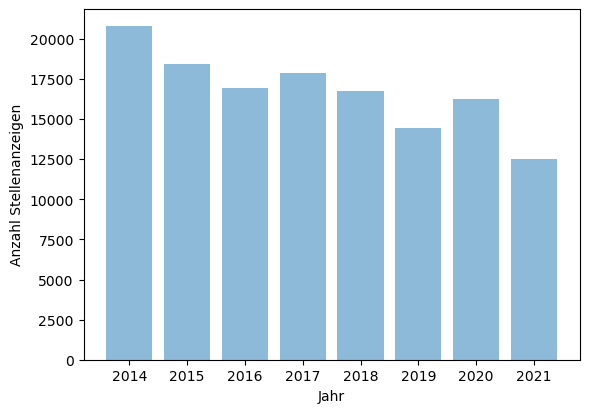

In [7]:
# Anzahl Inserate pro Jahr
objects = ('2014', '2015', '2016', '2017', '2018','2019','2020', '2021')

y_pos       = np.arange(len(objects))
performance = [len(data.query('year == 2014').index),
              len(data.query('year == 2015').index),
              len(data.query('year == 2016').index),
              len(data.query('year == 2017').index),
              len(data.query('year == 2018').index),
              len(data.query('year == 2019').index),
              len(data.query('year == 2020').index),
              len(data.query('year == 2021').index)]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='horizontal')
plt.ylabel('Anzahl Stellenanzeigen')
plt.xlabel('Jahr')
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('Anzahl_Inserate_Gesamtdaten.pdf')

plt.show()

In [8]:
# Abspeichern der Datei in ein csv
data.to_csv("Inserate_Gesamtdatenanalyse_AF_E.csv", sep=";")

In [9]:
# Filterung der Stellenanzeigen mit Listenelementen
data_listen = data[data['text'].str.contains('<li|</li', regex=True, flags=re.IGNORECASE, na=False)]
data_listen.shape

(75980, 13)

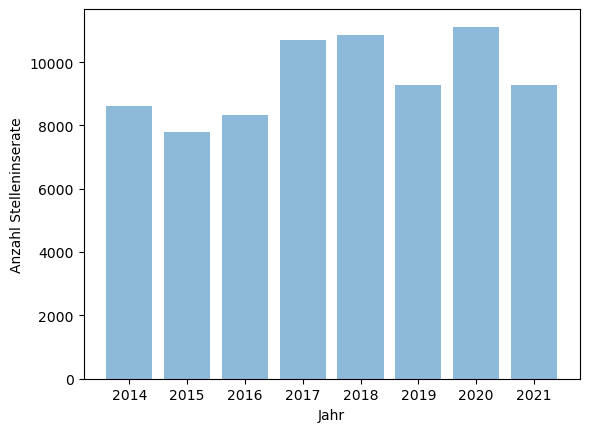

In [10]:
# Anzahl Inserate nach Jahr
objects = ('2014', '2015', '2016', '2017', '2018','2019','2020', '2021')
y_pos = np.arange(len(objects))
performance = [len(data_listen.query('year == 2014').index),
              len(data_listen.query('year == 2015').index),
              len(data_listen.query('year == 2016').index),
              len(data_listen.query('year == 2017').index),
              len(data_listen.query('year == 2018').index),
              len(data_listen.query('year == 2019').index),
              len(data_listen.query('year == 2020').index),
              len(data_listen.query('year == 2021').index)]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='horizontal')
plt.ylabel('Anzahl Stelleninserate')
plt.xlabel('Jahr')
plt.savefig('Anzahl_Inserate_Anforderungsdaten.pdf')

plt.show()

In [11]:
# Speichern und Exportieren der Daten pro Jahr für die Analyse der Anforderungen 
data_listen.to_csv("Inserate_Anforderungsanalyse_AF_E.csv", sep=";")